<a href="https://colab.research.google.com/github/gsgol/course_works/blob/main/course_project_absolute_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ПРОЕКТ ЭМОЦИОНАЛЬНАЯ ВОВЛЕЧЕННОСТЬ УЧАСТНИКОВ ОНЛАЙН МЕРОПРИЯТИЯ***

Импорт библиотек

In [ ]:
import os
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import cv2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import svm,metrics,preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from collections import defaultdict
import os
import random
import numpy as np
from tqdm import tqdm
import time
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
import torch
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.layers import TimeDistributed, GRU, Dense, Dropout, Flatten, LSTM, Activation, MaxPooling2D
from tensorflow.keras.regularizers import l2 as L2_reg
from tensorflow.keras.layers import Conv2D, BatchNormalization,MaxPool2D, GlobalMaxPool2D, Input, Masking, Conv3D, MaxPooling3D, GlobalMaxPool3D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.compat.v1.keras.backend import set_session
import glob
from itertools import chain
import os
import random
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from tqdm.notebook import tqdm 
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess=tf.compat.v1.Session(config=config)
set_session(sess)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device = torch.device('cuda')
device

device(type='cuda')

In [ ]:
DATA_DIR = '/content/drive/MyDrive/course_work'

## **Preparing** **data**

In [ ]:
def process_dir(dirname):
    print(dirname)
    d=os.path.join(DATA_DIR,dirname)
    for filename in tqdm(os.listdir(d)):
        if filename.lower().endswith('ini'):
            continue
        if os.path.isdir(os.path.join(d,filename)):
            videofile=None
            for fn in os.listdir(os.path.join(d,filename)):
                if fn.lower().endswith('ini'):
                    continue
                videofile=fn
            if videofile is None:
                print(filename)
                continue
            filename=os.path.join(filename,videofile)
        fn, ext = os.path.splitext(os.path.basename(filename))
        outdir=os.path.join(d,fn)
        if not os.path.exists(outdir):
            os.makedirs(outdir)
        command = "ffmpeg -i "+os.path.join(d,filename) + " -r 0.5 '"+outdir+"/%05d.png'"
        print(command)
        os.system(command=command)

process_dir('Test')

/content/drive/MyDrive/course_work/test_video


  0%|          | 0/1 [00:00<?, ?it/s]

ffmpeg -i /content/drive/MyDrive/course_work/test_video/2_6_2.mp4 -r 0.5 '/content/drive/MyDrive/course_work/test_frames/2_6_2/%05d.png'


In [ ]:
process_dir('Train')

Train


  0%|          | 0/19 [00:00<?, ?it/s]

ffmpeg -i /content/drive/MyDrive/course_work/Train/1_6.mp4 -r 0.5 '/content/drive/MyDrive/course_work/Train/1_6/%05d.png'
ffmpeg -i /content/drive/MyDrive/course_work/Train/2_1.mp4 -r 0.5 '/content/drive/MyDrive/course_work/Train/2_1/%05d.png'
ffmpeg -i /content/drive/MyDrive/course_work/Train/0_1.mp4 -r 0.5 '/content/drive/MyDrive/course_work/Train/0_1/%05d.png'
ffmpeg -i /content/drive/MyDrive/course_work/Train/1_3.mp4 -r 0.5 '/content/drive/MyDrive/course_work/Train/1_3/%05d.png'
ffmpeg -i /content/drive/MyDrive/course_work/Train/2_5.mp4 -r 0.5 '/content/drive/MyDrive/course_work/Train/2_5/%05d.png'
ffmpeg -i /content/drive/MyDrive/course_work/Train/0_5.mp4 -r 0.5 '/content/drive/MyDrive/course_work/Train/0_5/%05d.png'
ffmpeg -i /content/drive/MyDrive/course_work/Train/1_1.mp4 -r 0.5 '/content/drive/MyDrive/course_work/Train/1_1/%05d.png'
ffmpeg -i /content/drive/MyDrive/course_work/Train/2_8.mp4 -r 0.5 '/content/drive/MyDrive/course_work/Train/2_8/%05d.png'
ffmpeg -i /content/drive

In [ ]:
process_dir('Validation')

Validation


  0%|          | 0/6 [00:00<?, ?it/s]

ffmpeg -i /content/drive/MyDrive/course_work/Validation/1_7_3.mp4 -r 0.5 '/content/drive/MyDrive/course_work/Validation/1_7_3/%05d.png'
ffmpeg -i /content/drive/MyDrive/course_work/Validation/1_8.mp4 -r 0.5 '/content/drive/MyDrive/course_work/Validation/1_8/%05d.png'
ffmpeg -i /content/drive/MyDrive/course_work/Validation/2_2_1.mp4 -r 0.5 '/content/drive/MyDrive/course_work/Validation/2_2_1/%05d.png'
ffmpeg -i /content/drive/MyDrive/course_work/Validation/3_5.mp4 -r 0.5 '/content/drive/MyDrive/course_work/Validation/3_5/%05d.png'
ffmpeg -i /content/drive/MyDrive/course_work/Validation/2_7_5.mp4 -r 0.5 '/content/drive/MyDrive/course_work/Validation/2_7_5/%05d.png'
ffmpeg -i /content/drive/MyDrive/course_work/Validation/2_7_6.mp4 -r 0.5 '/content/drive/MyDrive/course_work/Validation/2_7_6/%05d.png'


In [ ]:
def extract_openface_features(dirname,outdir):
    print(dirname)
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    os.chdir(dirname)
    command='/home/avsavchenko/src/distr/OpenFace/build/bin/FeatureExtraction -pose -aus -gaze -out_dir '+outdir
    for filename in os.listdir('.'):
        if filename.lower().endswith('ini'):
            continue
        
        if os.path.isdir(filename):
            command+=' -fdir '+filename
        
    print(command)
    os.system(command=command)

cur_dir=os.getcwd()
extract_openface_features(os.path.join(DATA_DIR,'frames/validation/'),os.path.join(DATA_DIR,'frames/faces/openface/validation/'))
extract_openface_features(os.path.join(DATA_DIR,'frames/Train/'),os.path.join(DATA_DIR,'frames/faces/openface/Train/'))
os.chdir(cur_dir)
print(os.getcwd())

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sys
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = ''
import argparse
import tensorflow as tf
import numpy as np
import cv2
import time

import subprocess, re 


def is_specialfile(path,exts):
    _, file_extension = os.path.splitext(path)
    return file_extension.lower() in exts

img_extensions=['.jpg','.jpeg','.png']
def is_image(path):
    return is_specialfile(path,img_extensions)

video_extensions=['.mov','.avi']
def is_video(path):
    return is_specialfile(path,video_extensions)
    
class FacialImageProcessing:
    # minsize: minimum of faces' size
    def __init__(self, print_stat=False, minsize = 16):
        self.print_stat=print_stat
        self.minsize=minsize
        
        models_path = '/content/drive/MyDrive/course_work/Models'
        # models_path=os.path.join(models_path,'..','models','pretrained_faces')
        model_files={os.path.join(models_path,'mtcnn.pb'):''}

        with tf.Graph().as_default() as full_graph:
            for model_file in model_files:
                tf.import_graph_def(FacialImageProcessing.load_graph_def(model_file), name=model_files[model_file])
        self.sess=tf.compat.v1.Session(graph=full_graph)#,config=tf.ConfigProto(device_count={'CPU':1,'GPU':0}))
        self.pnet, self.rnet, self.onet = FacialImageProcessing.load_mtcnn(self.sess,full_graph)     

    def close(self):
        self.sess.close()
    
    @staticmethod
    def load_graph_def(frozen_graph_filename):
        graph_def=None
        with tf.io.gfile.GFile(frozen_graph_filename, 'rb') as f:
            graph_def = tf.compat.v1.GraphDef()
            graph_def.ParseFromString(f.read())
        return graph_def
    
    @staticmethod
    def load_graph(frozen_graph_filename, prefix=''):
        graph_def = FacialImageProcessing.load_graph_def(frozen_graph_filename)
        with tf.Graph().as_default() as graph:
            tf.import_graph_def(graph_def, name=prefix)
        return graph

    @staticmethod
    def load_mtcnn(sess,graph):
        pnet_out_1=graph.get_tensor_by_name('pnet/conv4-2/BiasAdd:0')
        pnet_out_2=graph.get_tensor_by_name('pnet/prob1:0')
        pnet_in=graph.get_tensor_by_name('pnet/input:0')
        
        rnet_out_1=graph.get_tensor_by_name('rnet/conv5-2/conv5-2:0')
        rnet_out_2=graph.get_tensor_by_name('rnet/prob1:0')
        rnet_in=graph.get_tensor_by_name('rnet/input:0')
        
        onet_out_1=graph.get_tensor_by_name('onet/conv6-2/conv6-2:0')
        onet_out_2=graph.get_tensor_by_name('onet/conv6-3/conv6-3:0')
        onet_out_3=graph.get_tensor_by_name('onet/prob1:0')
        onet_in=graph.get_tensor_by_name('onet/input:0')
        
        pnet_fun = lambda img : sess.run((pnet_out_1, pnet_out_2), feed_dict={pnet_in:img})
        rnet_fun = lambda img : sess.run((rnet_out_1, rnet_out_2), feed_dict={rnet_in:img})
        onet_fun = lambda img : sess.run((onet_out_1, onet_out_2, onet_out_3), feed_dict={onet_in:img})
        return pnet_fun, rnet_fun, onet_fun
        
    @staticmethod
    def bbreg(boundingbox,reg):
        # calibrate bounding boxes
        if reg.shape[1]==1:
            reg = np.reshape(reg, (reg.shape[2], reg.shape[3]))

        w = boundingbox[:,2]-boundingbox[:,0]+1
        h = boundingbox[:,3]-boundingbox[:,1]+1
        b1 = boundingbox[:,0]+reg[:,0]*w
        b2 = boundingbox[:,1]+reg[:,1]*h
        b3 = boundingbox[:,2]+reg[:,2]*w
        b4 = boundingbox[:,3]+reg[:,3]*h
        boundingbox[:,0:4] = np.transpose(np.vstack([b1, b2, b3, b4 ]))
        return boundingbox
     
    @staticmethod
    def generateBoundingBox(imap, reg, scale, t):
        # use heatmap to generate bounding boxes
        stride=2
        cellsize=12

        imap = np.transpose(imap)
        dx1 = np.transpose(reg[:,:,0])
        dy1 = np.transpose(reg[:,:,1])
        dx2 = np.transpose(reg[:,:,2])
        dy2 = np.transpose(reg[:,:,3])
        y, x = np.where(imap >= t)
        if y.shape[0]==1:
            dx1 = np.flipud(dx1)
            dy1 = np.flipud(dy1)
            dx2 = np.flipud(dx2)
            dy2 = np.flipud(dy2)
        score = imap[(y,x)]
        reg = np.transpose(np.vstack([ dx1[(y,x)], dy1[(y,x)], dx2[(y,x)], dy2[(y,x)] ]))
        if reg.size==0:
            reg = np.empty((0,3))
        bb = np.transpose(np.vstack([y,x]))
        q1 = np.fix((stride*bb+1)/scale)
        q2 = np.fix((stride*bb+cellsize-1+1)/scale)
        boundingbox = np.hstack([q1, q2, np.expand_dims(score,1), reg])
        return boundingbox, reg
     
    # function pick = nms(boxes,threshold,type)
    @staticmethod
    def nms(boxes, threshold, method):
        if boxes.size==0:
            return np.empty((0,3))
        x1 = boxes[:,0]
        y1 = boxes[:,1]
        x2 = boxes[:,2]
        y2 = boxes[:,3]
        s = boxes[:,4]
        area = (x2-x1+1) * (y2-y1+1)
        I = np.argsort(s)
        pick = np.zeros_like(s, dtype=np.int16)
        counter = 0
        while I.size>0:
            i = I[-1]
            pick[counter] = i
            counter += 1
            idx = I[0:-1]
            xx1 = np.maximum(x1[i], x1[idx])
            yy1 = np.maximum(y1[i], y1[idx])
            xx2 = np.minimum(x2[i], x2[idx])
            yy2 = np.minimum(y2[i], y2[idx])
            w = np.maximum(0.0, xx2-xx1+1)
            h = np.maximum(0.0, yy2-yy1+1)
            inter = w * h
            if method == 'Min':
                o = inter / np.minimum(area[i], area[idx])
            else:
                o = inter / (area[i] + area[idx] - inter)
            I = I[np.where(o<=threshold)]
        pick = pick[0:counter]
        return pick

    # function [dy edy dx edx y ey x ex tmpw tmph] = pad(total_boxes,w,h)
    @staticmethod
    def pad(total_boxes, w, h):
        # compute the padding coordinates (pad the bounding boxes to square)
        tmpw = (total_boxes[:,2]-total_boxes[:,0]+1).astype(np.int32)
        tmph = (total_boxes[:,3]-total_boxes[:,1]+1).astype(np.int32)
        numbox = total_boxes.shape[0]

        dx = np.ones((numbox), dtype=np.int32)
        dy = np.ones((numbox), dtype=np.int32)
        edx = tmpw.copy().astype(np.int32)
        edy = tmph.copy().astype(np.int32)

        x = total_boxes[:,0].copy().astype(np.int32)
        y = total_boxes[:,1].copy().astype(np.int32)
        ex = total_boxes[:,2].copy().astype(np.int32)
        ey = total_boxes[:,3].copy().astype(np.int32)

        tmp = np.where(ex>w)
        edx.flat[tmp] = np.expand_dims(-ex[tmp]+w+tmpw[tmp],1)
        ex[tmp] = w
        
        tmp = np.where(ey>h)
        edy.flat[tmp] = np.expand_dims(-ey[tmp]+h+tmph[tmp],1)
        ey[tmp] = h

        tmp = np.where(x<1)
        dx.flat[tmp] = np.expand_dims(2-x[tmp],1)
        x[tmp] = 1

        tmp = np.where(y<1)
        dy.flat[tmp] = np.expand_dims(2-y[tmp],1)
        y[tmp] = 1
        
        return dy, edy, dx, edx, y, ey, x, ex, tmpw, tmph

    # function [bboxA] = rerec(bboxA)
    @staticmethod
    def rerec(bboxA):
        # convert bboxA to square
        h = bboxA[:,3]-bboxA[:,1]
        w = bboxA[:,2]-bboxA[:,0]
        l = np.maximum(w, h)
        bboxA[:,0] = bboxA[:,0]+w*0.5-l*0.5
        bboxA[:,1] = bboxA[:,1]+h*0.5-l*0.5
        bboxA[:,2:4] = bboxA[:,0:2] + np.transpose(np.tile(l,(2,1)))
        return bboxA

    def detect_faces(self,img):
        # im: input image
        # threshold: threshold=[th1 th2 th3], th1-3 are three steps's threshold
        threshold = [ 0.6, 0.7, 0.9 ]  # three steps's threshold
        # fastresize: resize img from last scale (using in high-resolution images) if fastresize==true
        factor = 0.709 # scale factor
        factor_count=0
        total_boxes=np.empty((0,9))
        points=np.array([])
        h=img.shape[0]
        w=img.shape[1]
        minl=np.amin([h, w])
        m=12.0/self.minsize
        minl=minl*m
        # creat scale pyramid
        scales=[]
        while minl>=12:
            scales += [m*np.power(factor, factor_count)]
            minl = minl*factor
            factor_count += 1

        # first stage
        #t=time.time()
        for j in range(len(scales)):
            scale=scales[j]
            hs=int(np.ceil(h*scale))
            ws=int(np.ceil(w*scale))
            im_data = cv2.resize(img, (ws,hs), interpolation=cv2.INTER_AREA)
            im_data = (im_data-127.5)*0.0078125
            img_x = np.expand_dims(im_data, 0)
            img_y = np.transpose(img_x, (0,2,1,3))
            out = self.pnet(img_y)
            out0 = np.transpose(out[0], (0,2,1,3))
            out1 = np.transpose(out[1], (0,2,1,3))
            
            boxes, _ = FacialImageProcessing.generateBoundingBox(out1[0,:,:,1].copy(), out0[0,:,:,:].copy(), scale, threshold[0])
            
            # inter-scale nms
            pick = FacialImageProcessing.nms(boxes.copy(), 0.5, 'Union')
            if boxes.size>0 and pick.size>0:
                boxes = boxes[pick,:]
                total_boxes = np.append(total_boxes, boxes, axis=0)
        numbox = total_boxes.shape[0]
        #elapsed = time.time() - t
        #print('1 phase nb=%d elapsed=%f'%(numbox,elapsed))
        if numbox>0:
            pick = FacialImageProcessing.nms(total_boxes.copy(), 0.7, 'Union')
            total_boxes = total_boxes[pick,:]
            regw = total_boxes[:,2]-total_boxes[:,0]
            regh = total_boxes[:,3]-total_boxes[:,1]
            qq1 = total_boxes[:,0]+total_boxes[:,5]*regw
            qq2 = total_boxes[:,1]+total_boxes[:,6]*regh
            qq3 = total_boxes[:,2]+total_boxes[:,7]*regw
            qq4 = total_boxes[:,3]+total_boxes[:,8]*regh
            total_boxes = np.transpose(np.vstack([qq1, qq2, qq3, qq4, total_boxes[:,4]]))
            total_boxes = FacialImageProcessing.rerec(total_boxes.copy())
            total_boxes[:,0:4] = np.fix(total_boxes[:,0:4]).astype(np.int32)
            dy, edy, dx, edx, y, ey, x, ex, tmpw, tmph = FacialImageProcessing.pad(total_boxes.copy(), w, h)

        numbox = total_boxes.shape[0]
        #elapsed = time.time() - t
        #print('2 phase nb=%d elapsed=%f'%(numbox,elapsed))
        if numbox>0:
            # second stage
            tempimg = np.zeros((24,24,3,numbox))
            for k in range(0,numbox):
                tmp = np.zeros((int(tmph[k]),int(tmpw[k]),3))
                tmp[dy[k]-1:edy[k],dx[k]-1:edx[k],:] = img[y[k]-1:ey[k],x[k]-1:ex[k],:]
                if tmp.shape[0]>0 and tmp.shape[1]>0 or tmp.shape[0]==0 and tmp.shape[1]==0:
                    tempimg[:,:,:,k] = cv2.resize(tmp, (24,24), interpolation=cv2.INTER_AREA)
                else:
                    return np.empty()
            tempimg = (tempimg-127.5)*0.0078125
            tempimg1 = np.transpose(tempimg, (3,1,0,2))
            out = self.rnet(tempimg1)
            out0 = np.transpose(out[0])
            out1 = np.transpose(out[1])
            score = out1[1,:]
            ipass = np.where(score>threshold[1])
            total_boxes = np.hstack([total_boxes[ipass[0],0:4].copy(), np.expand_dims(score[ipass].copy(),1)])
            mv = out0[:,ipass[0]]
            if total_boxes.shape[0]>0:
                pick = FacialImageProcessing.nms(total_boxes, 0.7, 'Union')
                total_boxes = total_boxes[pick,:]
                total_boxes = FacialImageProcessing.bbreg(total_boxes.copy(), np.transpose(mv[:,pick]))
                total_boxes = FacialImageProcessing.rerec(total_boxes.copy())

        numbox = total_boxes.shape[0]
        #elapsed = time.time() - t
        #print('3 phase nb=%d elapsed=%f'%(numbox,elapsed))
        if numbox>0:
            # third stage
            total_boxes = np.fix(total_boxes).astype(np.int32)
            dy, edy, dx, edx, y, ey, x, ex, tmpw, tmph = FacialImageProcessing.pad(total_boxes.copy(), w, h)
            tempimg = np.zeros((48,48,3,numbox))
            for k in range(0,numbox):
                tmp = np.zeros((int(tmph[k]),int(tmpw[k]),3))
                tmp[dy[k]-1:edy[k],dx[k]-1:edx[k],:] = img[y[k]-1:ey[k],x[k]-1:ex[k],:]
                if tmp.shape[0]>0 and tmp.shape[1]>0 or tmp.shape[0]==0 and tmp.shape[1]==0:
                    tempimg[:,:,:,k] = cv2.resize(tmp, (48,48), interpolation=cv2.INTER_AREA)
                else:
                    return np.empty()
            tempimg = (tempimg-127.5)*0.0078125
            tempimg1 = np.transpose(tempimg, (3,1,0,2))
            out = self.onet(tempimg1)
            out0 = np.transpose(out[0])
            out1 = np.transpose(out[1])
            out2 = np.transpose(out[2])
            score = out2[1,:]
            points = out1
            ipass = np.where(score>threshold[2])
            points = points[:,ipass[0]]
            total_boxes = np.hstack([total_boxes[ipass[0],0:4].copy(), np.expand_dims(score[ipass].copy(),1)])
            mv = out0[:,ipass[0]]

            w = total_boxes[:,2]-total_boxes[:,0]+1
            h = total_boxes[:,3]-total_boxes[:,1]+1
            points[0:5,:] = np.tile(w,(5, 1))*points[0:5,:] + np.tile(total_boxes[:,0],(5, 1))-1
            points[5:10,:] = np.tile(h,(5, 1))*points[5:10,:] + np.tile(total_boxes[:,1],(5, 1))-1
            if total_boxes.shape[0]>0:
                total_boxes = FacialImageProcessing.bbreg(total_boxes.copy(), np.transpose(mv))
                pick = FacialImageProcessing.nms(total_boxes.copy(), 0.7, 'Min')
                total_boxes = total_boxes[pick,:]
                points = points[:,pick]
        #elapsed = time.time() - t
        #print('4 phase elapsed=%f'%(elapsed))            
        return total_boxes, points

In [ ]:
imgProcessing=FacialImageProcessing(False)

In [ ]:
INPUT_SIZE = (224,224)
def save_faces(source_path,save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    for folder in tqdm(os.listdir(source_path)):
        if not os.path.exists(os.path.join(save_path, folder)):
            os.mkdir(os.path.join(save_path, folder))

            for image in os.listdir(os.path.join(source_path, folder)):
                filename = os.path.join(source_path, folder, image)
                frame_bgr = cv2.imread(filename)
                frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
                bounding_boxes, _ = imgProcessing.detect_faces(frame)

                if len(bounding_boxes)==0:
                    print('No faces found for ',filename)
                    face_img = frame_bgr
                    faceFound='noface'
                else:
                    if len(bounding_boxes)>1:
                        print('Too many faces (',len(bounding_boxes),') found for ',filename)
                        bounding_boxes=bounding_boxes[:1]

                    b=[int(bi) for bi in bounding_boxes[0]]
                    x1,y1,x2,y2=b[0:4]
                    face_img=frame_bgr[y1:y2,x1:x2,:]

                    if np.prod(face_img.shape)==0:
                        print('Empty face ',b,' found for ',filename)
                        continue
                    
                    faceFound=''

                #face_img=cv2.resize(face_img,INPUT_SIZE)
                root,ext=os.path.splitext(image)
                cv2.imwrite(os.path.join(save_path, folder, root+faceFound+ext), face_img) 
        else:
            print(folder)
        
save_faces(os.path.join(DATA_DIR,'frames/Validation'),os.path.join(DATA_DIR,'cropped/Validation'))

  0%|          | 0/6 [00:00<?, ?it/s]

1_7_3
1_8
2_2_1
3_5
2_7_5
2_7_6


In [ ]:
save_faces(os.path.join(DATA_DIR,'frames/Train'),os.path.join(DATA_DIR,'cropped/Train'))

  0%|          | 0/19 [00:00<?, ?it/s]

No faces found for  /content/drive/MyDrive/course_work/frames/Train/0_1/00014.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/0_1/00015.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/0_1/00016.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/0_1/00048.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/1_3/00009.png
Empty face  [-18, 36, 328, 503, 0]  found for  /content/drive/MyDrive/course_work/frames/Train/0_5/00008.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/2_8/00062.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/2_8/00063.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/2_8/00064.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/0_5_1/00040.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/0_5_1/00041.png
Too many faces ( 2 ) found for  /content/drive/MyDrive/course_work/

In [ ]:
save_faces(os.path.join(DATA_DIR,'frames/Test'),os.path.join(DATA_DIR,'cropped/Test'))

  0%|          | 0/13 [00:00<?, ?it/s]

No faces found for  /content/drive/MyDrive/course_work/frames/Test/3_7/00005.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/3_7/00046.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/3_7/00047.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/3_7/00048.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/3_7/00049.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/3_7/00060.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/1_6_1/00008.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/1_7/00046.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/1_7/00047.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/1_7/00048.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/1_7/00049.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/1_7/00050.png
No faces found for  /conte

In [ ]:
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : array
        order: {'x1', 'y1', 'x2', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : array
        order: {'x1', 'y1', 'x2', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    return iou
def preprocess(img, bbox=None, landmark=None, **kwargs):
    M = None
    image_size = [224,224]
    src = np.array([
      [30.2946, 51.6963],
      [65.5318, 51.5014],
      [48.0252, 71.7366],
      [33.5493, 92.3655],
      [62.7299, 92.2041] ], dtype=np.float32 )
    if image_size[1]==224:
        src[:,0] += 8.0
    src*=2
    if landmark is not None:
        dst = landmark.astype(np.float32)

        tform = trans.SimilarityTransform()
        #dst=dst[:3]
        #src=src[:3]
        #print(dst.shape,src.shape,dst,src)
        tform.estimate(dst, src)
        M = tform.params[0:2,:]
        #M = cv2.estimateRigidTransform( dst.reshape(1,5,2), src.reshape(1,5,2), False)
        #print(M)

    if M is None:
        if bbox is None: #use center crop
            det = np.zeros(4, dtype=np.int32)
            det[0] = int(img.shape[1]*0.0625)
            det[1] = int(img.shape[0]*0.0625)
            det[2] = img.shape[1] - det[0]
            det[3] = img.shape[0] - det[1]
        else:
              det = bbox
        margin = kwargs.get('margin', 44)
        bb = np.zeros(4, dtype=np.int32)
        bb[0] = np.maximum(det[0]-margin//2, 0)
        bb[1] = np.maximum(det[1]-margin//2, 0)
        bb[2] = np.minimum(det[2]+margin//2, img.shape[1])
        bb[3] = np.minimum(det[3]+margin//2, img.shape[0])
        ret = img[bb[1]:bb[3],bb[0]:bb[2],:]
        if len(image_size)>0:
              ret = cv2.resize(ret, (image_size[1], image_size[0]))
        return ret 
    else: #do align using landmark
        assert len(image_size)==2
        warped = cv2.warpAffine(img,M,(image_size[1],image_size[0]), borderValue = 0.0)
        return warped

In [ ]:
def save_aligned_faces(source_path,save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    for folder in tqdm(os.listdir(source_path)):
        if not os.path.exists(os.path.join(save_path, folder)):
            os.mkdir(os.path.join(save_path, folder))

            prev_b = None
            counter = 0

            for image in sorted(os.listdir(os.path.join(source_path, folder))):
                filename = os.path.join(source_path, folder, image)
                frame = cv2.imread(filename)
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                bounding_boxes, points = imgProcessing.detect_faces(frame)
                points = points.T

                best_ind=None
                if len(bounding_boxes)==0:
                    print('No faces found for ',filename)
                    counter+=1
                    if prev_b is None or counter>3:
                        continue
                    else:
                        b=prev_b
                elif len(bounding_boxes)>1:
                    print('Too many faces (',len(bounding_boxes),') found for ',filename)
                    if prev_b is None:
                        #continue
                        best_ind=0
                        b=[int(bi) for bi in bounding_boxes[best_ind]]
                        counter=0
                    else:
                        best_iou=0
                        for i in range(len(bounding_boxes)):
                            iou=get_iou(bounding_boxes[i],prev_b)
                            if iou>best_iou:
                                best_iou=iou
                                best_ind=i
                        if best_iou>0:
                            b=[int(bi) for bi in bounding_boxes[best_ind]]
                            print('best_iou (',best_iou,') best_bb ',bounding_boxes[best_ind])
                        else:
                            #continue
                            best_ind=0
                            b=[int(bi) for bi in bounding_boxes[best_ind]]
                            counter=0
                else:
                    best_ind=0
                    b=[int(bi) for bi in bounding_boxes[best_ind]]
                    counter=0
                prev_b=b

                if True:
                    p=None
                    if best_ind is not None:
                        p=points[best_ind]
                        if True: #not USE_RETINA_FACE:
                            p = p.reshape((2,5)).T
                    face_img=preprocess(frame,b,None) #p)
                else:
                    x1,y1,x2,y2=b[0:4]
                    face_img=frame[y1:y2,x1:x2,:]
                if np.prod(face_img.shape)==0:
                    print('Empty face ',b,' found for ',filename)
                    continue

                cv2.imwrite(os.path.join(save_path, folder, image), cv2.cvtColor(face_img, cv2.COLOR_RGB2BGR)) 


In [ ]:
save_aligned_faces(os.path.join(DATA_DIR,'frames/Test'),os.path.join(DATA_DIR,'cropped/aligned/Test'))
save_aligned_faces(os.path.join(DATA_DIR,'frames/Train'),os.path.join(DATA_DIR,'cropped/aligned/Train'))
save_aligned_faces(os.path.join(DATA_DIR,'frames/Validation'),os.path.join(DATA_DIR,'cropped/aligned/Validation'))

  0%|          | 0/13 [00:00<?, ?it/s]

No faces found for  /content/drive/MyDrive/course_work/frames/Test/3_7/00005.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/3_7/00046.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/3_7/00047.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/3_7/00048.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/3_7/00049.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/3_7/00060.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/1_6_1/00008.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/1_7/00046.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/1_7/00047.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/1_7/00048.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/1_7/00049.png
No faces found for  /content/drive/MyDrive/course_work/frames/Test/1_7/00050.png
No faces found for  /conte

  0%|          | 0/19 [00:00<?, ?it/s]

No faces found for  /content/drive/MyDrive/course_work/frames/Train/0_1/00014.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/0_1/00015.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/0_1/00016.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/0_1/00048.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/1_3/00009.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/2_8/00062.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/2_8/00063.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/2_8/00064.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/0_5_1/00040.png
No faces found for  /content/drive/MyDrive/course_work/frames/Train/0_5_1/00041.png
Too many faces ( 2 ) found for  /content/drive/MyDrive/course_work/frames/Train/1_4_2/00083.png
best_iou ( 0.974300224313131 ) best_bb  [491.08335059 278.55186836 803.50597277 

  0%|          | 0/6 [00:00<?, ?it/s]

No faces found for  /content/drive/MyDrive/course_work/frames/Validation/2_7_5/00029.png
No faces found for  /content/drive/MyDrive/course_work/frames/Validation/2_7_5/00030.png
No faces found for  /content/drive/MyDrive/course_work/frames/Validation/2_7_5/00031.png
No faces found for  /content/drive/MyDrive/course_work/frames/Validation/2_7_5/00032.png
No faces found for  /content/drive/MyDrive/course_work/frames/Validation/2_7_5/00033.png
No faces found for  /content/drive/MyDrive/course_work/frames/Validation/2_7_5/00034.png
No faces found for  /content/drive/MyDrive/course_work/frames/Validation/2_7_5/00035.png
No faces found for  /content/drive/MyDrive/course_work/frames/Validation/2_7_5/00036.png
No faces found for  /content/drive/MyDrive/course_work/frames/Validation/2_7_5/00037.png
No faces found for  /content/drive/MyDrive/course_work/frames/Validation/2_7_5/00038.png
No faces found for  /content/drive/MyDrive/course_work/frames/Validation/2_7_5/00039.png
No faces found for  /

In [ ]:
save_aligned_faces(os.path.join(DATA_DIR,'Test/frames'),os.path.join(DATA_DIR,'cropped/aligned_2/Test'))
save_aligned_faces(os.path.join(DATA_DIR,'Train/frames'),os.path.join(DATA_DIR,'cropped/aligned_2/Train'))
save_aligned_faces(os.path.join(DATA_DIR,'Validation/frames'),os.path.join(DATA_DIR,'cropped/aligned_2/Validation'))

  0%|          | 0/18 [00:00<?, ?it/s]

No faces found for  /content/drive/MyDrive/project/Датасэт/Test/frames/1_6_1/00008.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Test/frames/1_7/00046.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Test/frames/1_7/00047.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Test/frames/1_7/00048.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Test/frames/1_7/00049.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Test/frames/1_7/00050.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Test/frames/1_7/00051.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Test/frames/1_7/00052.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Test/frames/1_7/00053.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Test/frames/1_7_2/00004.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Test/frames/1_7_2/00005.png
No faces found for  /content/drive/MyDrive/project/Датасэт/

  0%|          | 0/20 [00:00<?, ?it/s]

No faces found for  /content/drive/MyDrive/project/Датасэт/Train/frames/1_3/00009.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Train/frames/0_5_1/00040.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Train/frames/0_5_1/00041.png
Too many faces ( 2 ) found for  /content/drive/MyDrive/project/Датасэт/Train/frames/3_4_4/00089.png
best_iou ( 0.9596440329438631 ) best_bb  [509.56414306 215.2859764  833.36680609 612.19771779   0.99994576]
Too many faces ( 2 ) found for  /content/drive/MyDrive/project/Датасэт/Train/frames/3_4_4/00090.png
best_iou ( 0.9554795359910803 ) best_bb  [517.84188291 215.84387389 837.75404403 612.49367268   0.99998331]
Too many faces ( 2 ) found for  /content/drive/MyDrive/project/Датасэт/Train/frames/3_4_4/00093.png
best_iou ( 0.9452478055665529 ) best_bb  [515.08553337 208.66246748 841.74161211 609.59455252   0.99990535]
Too many faces ( 2 ) found for  /content/drive/MyDrive/project/Датасэт/Train/frames/1_4_2/00083.png
best_iou ( 0.9

  0%|          | 0/20 [00:00<?, ?it/s]

Too many faces ( 2 ) found for  /content/drive/MyDrive/project/Датасэт/Validation/frames/3_1_1/00024.png
best_iou ( 0.9849174188163964 ) best_bb  [584.75502819 406.25657268 726.22939119 595.35224442   0.99999487]
Too many faces ( 2 ) found for  /content/drive/MyDrive/project/Датасэт/Validation/frames/3_1_1/00025.png
best_iou ( 0.9508705824101706 ) best_bb  [587.68196878 408.3282536  727.68905687 595.00597186   0.99999821]
No faces found for  /content/drive/MyDrive/project/Датасэт/Validation/frames/0_1_4/00102.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Validation/frames/2_7_5/00029.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Validation/frames/2_7_5/00030.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Validation/frames/2_7_5/00031.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Validation/frames/2_7_5/00032.png
No faces found for  /content/drive/MyDrive/project/Датасэт/Validation/frames/2_7_5/00033.png
No faces found f

In [ ]:
from tensorflow.keras.applications import mobilenet
from tensorflow.keras.models import load_model,Model

# Data preprocessing 2

In [ ]:
data_transforms = {
    'Train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'Test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'Validation': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/MyDrive/course_work/cropped/aligned/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['Train','Test','Validation']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=2)
              for x in ['Train','Test','Validation']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['Train','Test','Validation']}

In [ ]:
image_datasets.keys()

dict_keys(['Train', 'Validation', 'Test'])

In [ ]:
dataloaders

{'Test': <torch.utils.data.dataloader.DataLoader at 0x7fe0904147d0>,
 'Train': <torch.utils.data.dataloader.DataLoader at 0x7fe1ea5cd850>,
 'Validation': <torch.utils.data.dataloader.DataLoader at 0x7fe090414fd0>}

In [ ]:
image_datasets['Test'].classes

['2_6_2']

In [ ]:
class_names = image_datasets['Train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

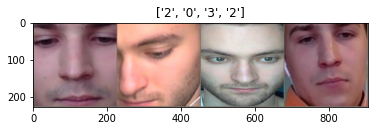

In [ ]:
import torchvision


def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['Train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    CUDA_LAUNCH_BLOCKING = "1"
    since = time.time()

    # best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['Train', 'Validation']:
            if phase == 'Train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'Train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'Train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'Train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'Validation' and epoch_acc > best_acc:
                best_acc = epoch_acc
                # best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    # model.load_state_dict(best_model_wts)
    return model

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['Test']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 4, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
import torchvision.models as models

# Resnet

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 4)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = torch.optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
import copy
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
Train Loss: 1.0656 Acc: 0.5909
Validation Loss: 1.2951 Acc: 0.4753

Epoch 1/9
----------
Train Loss: 0.9503 Acc: 0.6420
Validation Loss: 1.1406 Acc: 0.6351

Epoch 2/9
----------
Train Loss: 0.8163 Acc: 0.6738
Validation Loss: 0.8030 Acc: 0.6351

Epoch 3/9
----------
Train Loss: 0.7573 Acc: 0.7088
Validation Loss: 0.8765 Acc: 0.7061

Epoch 4/9
----------
Train Loss: 0.7044 Acc: 0.7208
Validation Loss: 1.0496 Acc: 0.6450

Epoch 5/9
----------
Train Loss: 0.6915 Acc: 0.7401
Validation Loss: 1.3392 Acc: 0.6667

Epoch 6/9
----------
Train Loss: 0.6595 Acc: 0.7511
Validation Loss: 0.8907 Acc: 0.6805

Epoch 7/9
----------
Train Loss: 0.5242 Acc: 0.7924
Validation Loss: 0.7146 Acc: 0.7239

Epoch 8/9
----------
Train Loss: 0.4888 Acc: 0.8069
Validation Loss: 0.7839 Acc: 0.7199

Epoch 9/9
----------
Train Loss: 0.4583 Acc: 0.8208
Validation Loss: 0.8386 Acc: 0.7318

Training complete in 4m 12s
Best val Acc: 0.731755


In [ ]:
visualize_model(model_ft)

<Figure size 432x288 with 0 Axes>

In [ ]:
model_ft = models.resnet18(pretrained=False)
num_ftrs = model_ft.fc.in_features
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 4)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = torch.optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

In [ ]:
visualize_model(model_ft)

In [ ]:
params = [p for p in model_ft.parameters() if p.requires_grad]
optimizer_ft = torch.optim.Adam(params, lr=0.001, weight_decay=0.0005)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

In [ ]:
visualize_model(model_ft)

#ALEXNET

In [ ]:
model_an = models.alexnet(pretrained=True)
model_an.classifier[6] = nn.Linear(4096,4)

model_an = model_an.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = torch.optim.SGD(model_an.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
import copy
model_ft = train_model(model_an, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
Train Loss: 1.0768 Acc: 0.5467
Validation Loss: 1.2147 Acc: 0.4635

Epoch 1/9
----------
Train Loss: 0.8639 Acc: 0.6432
Validation Loss: 1.0670 Acc: 0.6095

Epoch 2/9
----------
Train Loss: 0.7681 Acc: 0.6757
Validation Loss: 1.1046 Acc: 0.5562

Epoch 3/9
----------
Train Loss: 0.7243 Acc: 0.7076
Validation Loss: 0.7785 Acc: 0.6765

Epoch 4/9
----------
Train Loss: 0.6562 Acc: 0.7221
Validation Loss: 0.8048 Acc: 0.6746

Epoch 5/9
----------
Train Loss: 0.6468 Acc: 0.7388
Validation Loss: 0.7880 Acc: 0.6765

Epoch 6/9
----------
Train Loss: 0.6098 Acc: 0.7489
Validation Loss: 0.7493 Acc: 0.6903

Epoch 7/9
----------
Train Loss: 0.5342 Acc: 0.7823
Validation Loss: 0.8261 Acc: 0.6943

Epoch 8/9
----------
Train Loss: 0.4907 Acc: 0.7959
Validation Loss: 0.7820 Acc: 0.6963

Epoch 9/9
----------
Train Loss: 0.5015 Acc: 0.7924
Validation Loss: 0.7787 Acc: 0.6765

Training complete in 3m 45s
Best val Acc: 0.696252


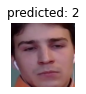

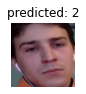

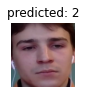

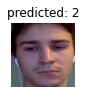

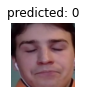

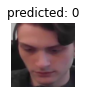

In [ ]:
visualize_model(model_an)

# VGG

In [ ]:
model_vgg = models.vgg11(pretrained=True)
model_vgg.classifier[6] = nn.Linear(4096,4)

model_vgg = model_vgg.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = torch.optim.SGD(model_vgg.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /root/.cache/torch/hub/checkpoints/vgg11-8a719046.pth


  0%|          | 0.00/507M [00:00<?, ?B/s]

In [ ]:
model_vgg = train_model(model_vgg, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
Train Loss: 0.8947 Acc: 0.6155
Validation Loss: 1.3241 Acc: 0.5680

Epoch 1/9
----------
Train Loss: 0.7123 Acc: 0.6968
Validation Loss: 0.9147 Acc: 0.6903

Epoch 2/9
----------
Train Loss: 0.6349 Acc: 0.7382
Validation Loss: 1.1088 Acc: 0.6746

Epoch 3/9
----------
Train Loss: 0.5791 Acc: 0.7555
Validation Loss: 0.9113 Acc: 0.6469

Epoch 4/9
----------
Train Loss: 0.5431 Acc: 0.7842
Validation Loss: 0.9608 Acc: 0.5957

Epoch 5/9
----------
Train Loss: 0.5318 Acc: 0.7861
Validation Loss: 0.7868 Acc: 0.6903

Epoch 6/9
----------
Train Loss: 0.5085 Acc: 0.8006
Validation Loss: 0.9524 Acc: 0.7061

Epoch 7/9
----------
Train Loss: 0.4159 Acc: 0.8394
Validation Loss: 0.8191 Acc: 0.7041

Epoch 8/9
----------
Train Loss: 0.3977 Acc: 0.8334
Validation Loss: 0.7432 Acc: 0.7179

Epoch 9/9
----------
Train Loss: 0.3869 Acc: 0.8470
Validation Loss: 0.8571 Acc: 0.7179

Training complete in 9m 58s
Best val Acc: 0.717949


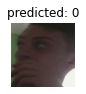

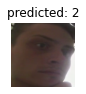

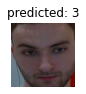

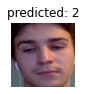

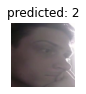

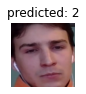

In [ ]:
visualize_model(model_vgg)

# DenseNet

In [ ]:
model_dn = models.densenet121(pretrained=True)
model_dn.classifier = nn.Linear(1024,4)

model_dn = model_dn.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = torch.optim.SGD(model_dn.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

In [ ]:
model_dn = train_model(model_dn, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
Train Loss: 1.0635 Acc: 0.5874
Validation Loss: 1.5040 Acc: 0.4793

Epoch 1/9
----------
Train Loss: 0.8761 Acc: 0.6615
Validation Loss: 1.4826 Acc: 0.6114

Epoch 2/9
----------
Train Loss: 0.8418 Acc: 0.6814
Validation Loss: 0.9709 Acc: 0.6647

Epoch 3/9
----------
Train Loss: 0.7766 Acc: 0.6987
Validation Loss: 1.5970 Acc: 0.5207

Epoch 4/9
----------
Train Loss: 0.7469 Acc: 0.7126
Validation Loss: 0.9235 Acc: 0.6824

Epoch 5/9
----------
Train Loss: 0.6495 Acc: 0.7413
Validation Loss: 1.4224 Acc: 0.6410

Epoch 6/9
----------
Train Loss: 0.6501 Acc: 0.7423
Validation Loss: 1.3796 Acc: 0.6331

Epoch 7/9
----------
Train Loss: 0.5112 Acc: 0.8000
Validation Loss: 0.8562 Acc: 0.6706

Epoch 8/9
----------
Train Loss: 0.4731 Acc: 0.8095
Validation Loss: 0.9107 Acc: 0.6529

Epoch 9/9
----------
Train Loss: 0.4687 Acc: 0.8155
Validation Loss: 0.7041 Acc: 0.7219

Training complete in 14m 23s
Best val Acc: 0.721893


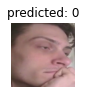

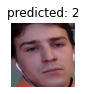

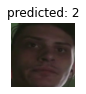

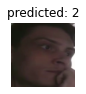

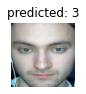

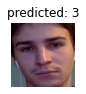

In [ ]:
visualize_model(model_dn)

In [ ]:
PATH = '/content/drive/MyDrive/course_work/Models/dn_model.pth'
torch.save(model_dn.state_dict(),PATH)

# efficientnet_b6

In [ ]:
model_e = models.efficientnet_b6(pretrained = True)

Downloading: "https://download.pytorch.org/models/efficientnet_b6_lukemelas-c76e70fd.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b6_lukemelas-c76e70fd.pth


  0%|          | 0.00/165M [00:00<?, ?B/s]

In [ ]:
model_e.classifier[1] = nn.Linear(2304,4)

model_e = model_e.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = torch.optim.SGD(model_e.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_e = train_model(model_e, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
Train Loss: 0.9829 Acc: 0.5883
Validation Loss: 0.9755 Acc: 0.5602

Epoch 1/9
----------
Train Loss: 0.7963 Acc: 0.6691
Validation Loss: 0.8791 Acc: 0.6075

Epoch 2/9
----------
Train Loss: 0.7380 Acc: 0.7044
Validation Loss: 0.8320 Acc: 0.6134

Epoch 3/9
----------
Train Loss: 0.7027 Acc: 0.7170
Validation Loss: 0.9010 Acc: 0.6292

Epoch 4/9
----------
Train Loss: 0.6495 Acc: 0.7366
Validation Loss: 0.9022 Acc: 0.6272

Epoch 5/9
----------
Train Loss: 0.6316 Acc: 0.7502
Validation Loss: 0.7515 Acc: 0.6568

Epoch 6/9
----------
Train Loss: 0.6136 Acc: 0.7511
Validation Loss: 0.8325 Acc: 0.6844

Epoch 7/9
----------
Train Loss: 0.5821 Acc: 0.7729
Validation Loss: 0.7446 Acc: 0.6903

Epoch 8/9
----------
Train Loss: 0.5592 Acc: 0.7823
Validation Loss: 0.7097 Acc: 0.7022

Epoch 9/9
----------
Train Loss: 0.5462 Acc: 0.7836
Validation Loss: 0.7180 Acc: 0.6943

Training complete in 23m 11s
Best val Acc: 0.702170


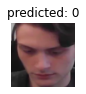

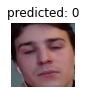

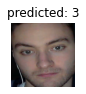

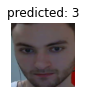

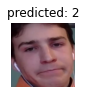

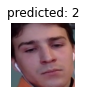

In [ ]:
visualize_model(model_e)

#APP

In [1]:
import os
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import cv2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import svm,metrics,preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from collections import defaultdict
import os
import random
import numpy as np
from tqdm import tqdm
import time
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
import torch
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.layers import TimeDistributed, GRU, Dense, Dropout, Flatten, LSTM, Activation, MaxPooling2D
from tensorflow.keras.regularizers import l2 as L2_reg
from tensorflow.keras.layers import Conv2D, BatchNormalization,MaxPool2D, GlobalMaxPool2D, Input, Masking, Conv3D, MaxPooling3D, GlobalMaxPool3D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.compat.v1.keras.backend import set_session
import glob
from itertools import chain
import os
import random
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from tqdm.notebook import tqdm 
import torchvision.models as models
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess=tf.compat.v1.Session(config=config)
set_session(sess)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
device = torch.device('cuda')
device

device(type='cuda')

In [4]:
dir_in = '/content/drive/MyDrive/course_work/test_video'
dir_out = '/content/drive/MyDrive/course_work/test_frames'
models_path = '/content/drive/MyDrive/course_work/Models'
font_path = '/content/drive/MyDrive/course_work/font/arial.ttf'
data_dir = '/content/drive/MyDrive/course_work/cropped/aligned/'

In [5]:
def process_dir(dirname, out_dir):
    print(dirname)
    d=os.path.join(dirname)
    for filename in tqdm(os.listdir(d)):
        if filename.lower().endswith('ini'):
            continue
        if os.path.isdir(os.path.join(d,filename)):
            videofile=None
            for fn in os.listdir(os.path.join(d,filename)):
                if fn.lower().endswith('ini'):
                    continue
                videofile=fn
            if videofile is None:
                print(filename)
                continue
            filename=os.path.join(filename,videofile)
        fn, ext = os.path.splitext(os.path.basename(filename))
        outdir=os.path.join(out_dir,fn)
        if not os.path.exists(outdir):
            os.makedirs(outdir)
        command = "ffmpeg -i "+os.path.join(d,filename) + " -r 0.5 '"+outdir+"/%05d.png'"
        print(command)
        os.system(command=command)

process_dir(dir_in, dir_out)

/content/drive/MyDrive/course_work/test_video


  0%|          | 0/1 [00:00<?, ?it/s]

ffmpeg -i /content/drive/MyDrive/course_work/test_video/2_6_2.mp4 -r 0.5 '/content/drive/MyDrive/course_work/test_frames/2_6_2/%05d.png'


In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sys
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = ''
import argparse
import tensorflow as tf
import numpy as np
import cv2
import time

import subprocess, re 


def is_specialfile(path,exts):
    _, file_extension = os.path.splitext(path)
    return file_extension.lower() in exts

img_extensions=['.jpg','.jpeg','.png']
def is_image(path):
    return is_specialfile(path,img_extensions)

video_extensions=['.mov','.avi']
def is_video(path):
    return is_specialfile(path,video_extensions)
    
class FacialImageProcessing:
    # minsize: minimum of faces' size
    def __init__(self, print_stat=False, minsize = 16):
        self.print_stat=print_stat
        self.minsize=minsize
        
        
        # models_path=os.path.join(models_path,'..','models','pretrained_faces')
        model_files={os.path.join(models_path,'mtcnn.pb'):''}

        with tf.Graph().as_default() as full_graph:
            for model_file in model_files:
                tf.import_graph_def(FacialImageProcessing.load_graph_def(model_file), name=model_files[model_file])
        self.sess=tf.compat.v1.Session(graph=full_graph)#,config=tf.ConfigProto(device_count={'CPU':1,'GPU':0}))
        self.pnet, self.rnet, self.onet = FacialImageProcessing.load_mtcnn(self.sess,full_graph)     

    def close(self):
        self.sess.close()
    
    @staticmethod
    def load_graph_def(frozen_graph_filename):
        graph_def=None
        with tf.io.gfile.GFile(frozen_graph_filename, 'rb') as f:
            graph_def = tf.compat.v1.GraphDef()
            graph_def.ParseFromString(f.read())
        return graph_def
    
    @staticmethod
    def load_graph(frozen_graph_filename, prefix=''):
        graph_def = FacialImageProcessing.load_graph_def(frozen_graph_filename)
        with tf.Graph().as_default() as graph:
            tf.import_graph_def(graph_def, name=prefix)
        return graph

    @staticmethod
    def load_mtcnn(sess,graph):
        pnet_out_1=graph.get_tensor_by_name('pnet/conv4-2/BiasAdd:0')
        pnet_out_2=graph.get_tensor_by_name('pnet/prob1:0')
        pnet_in=graph.get_tensor_by_name('pnet/input:0')
        
        rnet_out_1=graph.get_tensor_by_name('rnet/conv5-2/conv5-2:0')
        rnet_out_2=graph.get_tensor_by_name('rnet/prob1:0')
        rnet_in=graph.get_tensor_by_name('rnet/input:0')
        
        onet_out_1=graph.get_tensor_by_name('onet/conv6-2/conv6-2:0')
        onet_out_2=graph.get_tensor_by_name('onet/conv6-3/conv6-3:0')
        onet_out_3=graph.get_tensor_by_name('onet/prob1:0')
        onet_in=graph.get_tensor_by_name('onet/input:0')
        
        pnet_fun = lambda img : sess.run((pnet_out_1, pnet_out_2), feed_dict={pnet_in:img})
        rnet_fun = lambda img : sess.run((rnet_out_1, rnet_out_2), feed_dict={rnet_in:img})
        onet_fun = lambda img : sess.run((onet_out_1, onet_out_2, onet_out_3), feed_dict={onet_in:img})
        return pnet_fun, rnet_fun, onet_fun
        
    @staticmethod
    def bbreg(boundingbox,reg):
        # calibrate bounding boxes
        if reg.shape[1]==1:
            reg = np.reshape(reg, (reg.shape[2], reg.shape[3]))

        w = boundingbox[:,2]-boundingbox[:,0]+1
        h = boundingbox[:,3]-boundingbox[:,1]+1
        b1 = boundingbox[:,0]+reg[:,0]*w
        b2 = boundingbox[:,1]+reg[:,1]*h
        b3 = boundingbox[:,2]+reg[:,2]*w
        b4 = boundingbox[:,3]+reg[:,3]*h
        boundingbox[:,0:4] = np.transpose(np.vstack([b1, b2, b3, b4 ]))
        return boundingbox
     
    @staticmethod
    def generateBoundingBox(imap, reg, scale, t):
        # use heatmap to generate bounding boxes
        stride=2
        cellsize=12

        imap = np.transpose(imap)
        dx1 = np.transpose(reg[:,:,0])
        dy1 = np.transpose(reg[:,:,1])
        dx2 = np.transpose(reg[:,:,2])
        dy2 = np.transpose(reg[:,:,3])
        y, x = np.where(imap >= t)
        if y.shape[0]==1:
            dx1 = np.flipud(dx1)
            dy1 = np.flipud(dy1)
            dx2 = np.flipud(dx2)
            dy2 = np.flipud(dy2)
        score = imap[(y,x)]
        reg = np.transpose(np.vstack([ dx1[(y,x)], dy1[(y,x)], dx2[(y,x)], dy2[(y,x)] ]))
        if reg.size==0:
            reg = np.empty((0,3))
        bb = np.transpose(np.vstack([y,x]))
        q1 = np.fix((stride*bb+1)/scale)
        q2 = np.fix((stride*bb+cellsize-1+1)/scale)
        boundingbox = np.hstack([q1, q2, np.expand_dims(score,1), reg])
        return boundingbox, reg
     
    # function pick = nms(boxes,threshold,type)
    @staticmethod
    def nms(boxes, threshold, method):
        if boxes.size==0:
            return np.empty((0,3))
        x1 = boxes[:,0]
        y1 = boxes[:,1]
        x2 = boxes[:,2]
        y2 = boxes[:,3]
        s = boxes[:,4]
        area = (x2-x1+1) * (y2-y1+1)
        I = np.argsort(s)
        pick = np.zeros_like(s, dtype=np.int16)
        counter = 0
        while I.size>0:
            i = I[-1]
            pick[counter] = i
            counter += 1
            idx = I[0:-1]
            xx1 = np.maximum(x1[i], x1[idx])
            yy1 = np.maximum(y1[i], y1[idx])
            xx2 = np.minimum(x2[i], x2[idx])
            yy2 = np.minimum(y2[i], y2[idx])
            w = np.maximum(0.0, xx2-xx1+1)
            h = np.maximum(0.0, yy2-yy1+1)
            inter = w * h
            if method == 'Min':
                o = inter / np.minimum(area[i], area[idx])
            else:
                o = inter / (area[i] + area[idx] - inter)
            I = I[np.where(o<=threshold)]
        pick = pick[0:counter]
        return pick

    # function [dy edy dx edx y ey x ex tmpw tmph] = pad(total_boxes,w,h)
    @staticmethod
    def pad(total_boxes, w, h):
        # compute the padding coordinates (pad the bounding boxes to square)
        tmpw = (total_boxes[:,2]-total_boxes[:,0]+1).astype(np.int32)
        tmph = (total_boxes[:,3]-total_boxes[:,1]+1).astype(np.int32)
        numbox = total_boxes.shape[0]

        dx = np.ones((numbox), dtype=np.int32)
        dy = np.ones((numbox), dtype=np.int32)
        edx = tmpw.copy().astype(np.int32)
        edy = tmph.copy().astype(np.int32)

        x = total_boxes[:,0].copy().astype(np.int32)
        y = total_boxes[:,1].copy().astype(np.int32)
        ex = total_boxes[:,2].copy().astype(np.int32)
        ey = total_boxes[:,3].copy().astype(np.int32)

        tmp = np.where(ex>w)
        edx.flat[tmp] = np.expand_dims(-ex[tmp]+w+tmpw[tmp],1)
        ex[tmp] = w
        
        tmp = np.where(ey>h)
        edy.flat[tmp] = np.expand_dims(-ey[tmp]+h+tmph[tmp],1)
        ey[tmp] = h

        tmp = np.where(x<1)
        dx.flat[tmp] = np.expand_dims(2-x[tmp],1)
        x[tmp] = 1

        tmp = np.where(y<1)
        dy.flat[tmp] = np.expand_dims(2-y[tmp],1)
        y[tmp] = 1
        
        return dy, edy, dx, edx, y, ey, x, ex, tmpw, tmph

    # function [bboxA] = rerec(bboxA)
    @staticmethod
    def rerec(bboxA):
        # convert bboxA to square
        h = bboxA[:,3]-bboxA[:,1]
        w = bboxA[:,2]-bboxA[:,0]
        l = np.maximum(w, h)
        bboxA[:,0] = bboxA[:,0]+w*0.5-l*0.5
        bboxA[:,1] = bboxA[:,1]+h*0.5-l*0.5
        bboxA[:,2:4] = bboxA[:,0:2] + np.transpose(np.tile(l,(2,1)))
        return bboxA

    def detect_faces(self,img):
        # im: input image
        # threshold: threshold=[th1 th2 th3], th1-3 are three steps's threshold
        threshold = [ 0.6, 0.7, 0.9 ]  # three steps's threshold
        # fastresize: resize img from last scale (using in high-resolution images) if fastresize==true
        factor = 0.709 # scale factor
        factor_count=0
        total_boxes=np.empty((0,9))
        points=np.array([])
        h=img.shape[0]
        w=img.shape[1]
        minl=np.amin([h, w])
        m=12.0/self.minsize
        minl=minl*m
        # creat scale pyramid
        scales=[]
        while minl>=12:
            scales += [m*np.power(factor, factor_count)]
            minl = minl*factor
            factor_count += 1

        # first stage
        #t=time.time()
        for j in range(len(scales)):
            scale=scales[j]
            hs=int(np.ceil(h*scale))
            ws=int(np.ceil(w*scale))
            im_data = cv2.resize(img, (ws,hs), interpolation=cv2.INTER_AREA)
            im_data = (im_data-127.5)*0.0078125
            img_x = np.expand_dims(im_data, 0)
            img_y = np.transpose(img_x, (0,2,1,3))
            out = self.pnet(img_y)
            out0 = np.transpose(out[0], (0,2,1,3))
            out1 = np.transpose(out[1], (0,2,1,3))
            
            boxes, _ = FacialImageProcessing.generateBoundingBox(out1[0,:,:,1].copy(), out0[0,:,:,:].copy(), scale, threshold[0])
            
            # inter-scale nms
            pick = FacialImageProcessing.nms(boxes.copy(), 0.5, 'Union')
            if boxes.size>0 and pick.size>0:
                boxes = boxes[pick,:]
                total_boxes = np.append(total_boxes, boxes, axis=0)
        numbox = total_boxes.shape[0]
        #elapsed = time.time() - t
        #print('1 phase nb=%d elapsed=%f'%(numbox,elapsed))
        if numbox>0:
            pick = FacialImageProcessing.nms(total_boxes.copy(), 0.7, 'Union')
            total_boxes = total_boxes[pick,:]
            regw = total_boxes[:,2]-total_boxes[:,0]
            regh = total_boxes[:,3]-total_boxes[:,1]
            qq1 = total_boxes[:,0]+total_boxes[:,5]*regw
            qq2 = total_boxes[:,1]+total_boxes[:,6]*regh
            qq3 = total_boxes[:,2]+total_boxes[:,7]*regw
            qq4 = total_boxes[:,3]+total_boxes[:,8]*regh
            total_boxes = np.transpose(np.vstack([qq1, qq2, qq3, qq4, total_boxes[:,4]]))
            total_boxes = FacialImageProcessing.rerec(total_boxes.copy())
            total_boxes[:,0:4] = np.fix(total_boxes[:,0:4]).astype(np.int32)
            dy, edy, dx, edx, y, ey, x, ex, tmpw, tmph = FacialImageProcessing.pad(total_boxes.copy(), w, h)

        numbox = total_boxes.shape[0]
        #elapsed = time.time() - t
        #print('2 phase nb=%d elapsed=%f'%(numbox,elapsed))
        if numbox>0:
            # second stage
            tempimg = np.zeros((24,24,3,numbox))
            for k in range(0,numbox):
                tmp = np.zeros((int(tmph[k]),int(tmpw[k]),3))
                tmp[dy[k]-1:edy[k],dx[k]-1:edx[k],:] = img[y[k]-1:ey[k],x[k]-1:ex[k],:]
                if tmp.shape[0]>0 and tmp.shape[1]>0 or tmp.shape[0]==0 and tmp.shape[1]==0:
                    tempimg[:,:,:,k] = cv2.resize(tmp, (24,24), interpolation=cv2.INTER_AREA)
                else:
                    return np.empty()
            tempimg = (tempimg-127.5)*0.0078125
            tempimg1 = np.transpose(tempimg, (3,1,0,2))
            out = self.rnet(tempimg1)
            out0 = np.transpose(out[0])
            out1 = np.transpose(out[1])
            score = out1[1,:]
            ipass = np.where(score>threshold[1])
            total_boxes = np.hstack([total_boxes[ipass[0],0:4].copy(), np.expand_dims(score[ipass].copy(),1)])
            mv = out0[:,ipass[0]]
            if total_boxes.shape[0]>0:
                pick = FacialImageProcessing.nms(total_boxes, 0.7, 'Union')
                total_boxes = total_boxes[pick,:]
                total_boxes = FacialImageProcessing.bbreg(total_boxes.copy(), np.transpose(mv[:,pick]))
                total_boxes = FacialImageProcessing.rerec(total_boxes.copy())

        numbox = total_boxes.shape[0]
        #elapsed = time.time() - t
        #print('3 phase nb=%d elapsed=%f'%(numbox,elapsed))
        if numbox>0:
            # third stage
            total_boxes = np.fix(total_boxes).astype(np.int32)
            dy, edy, dx, edx, y, ey, x, ex, tmpw, tmph = FacialImageProcessing.pad(total_boxes.copy(), w, h)
            tempimg = np.zeros((48,48,3,numbox))
            for k in range(0,numbox):
                tmp = np.zeros((int(tmph[k]),int(tmpw[k]),3))
                tmp[dy[k]-1:edy[k],dx[k]-1:edx[k],:] = img[y[k]-1:ey[k],x[k]-1:ex[k],:]
                if tmp.shape[0]>0 and tmp.shape[1]>0 or tmp.shape[0]==0 and tmp.shape[1]==0:
                    tempimg[:,:,:,k] = cv2.resize(tmp, (48,48), interpolation=cv2.INTER_AREA)
                else:
                    return np.empty()
            tempimg = (tempimg-127.5)*0.0078125
            tempimg1 = np.transpose(tempimg, (3,1,0,2))
            out = self.onet(tempimg1)
            out0 = np.transpose(out[0])
            out1 = np.transpose(out[1])
            out2 = np.transpose(out[2])
            score = out2[1,:]
            points = out1
            ipass = np.where(score>threshold[2])
            points = points[:,ipass[0]]
            total_boxes = np.hstack([total_boxes[ipass[0],0:4].copy(), np.expand_dims(score[ipass].copy(),1)])
            mv = out0[:,ipass[0]]

            w = total_boxes[:,2]-total_boxes[:,0]+1
            h = total_boxes[:,3]-total_boxes[:,1]+1
            points[0:5,:] = np.tile(w,(5, 1))*points[0:5,:] + np.tile(total_boxes[:,0],(5, 1))-1
            points[5:10,:] = np.tile(h,(5, 1))*points[5:10,:] + np.tile(total_boxes[:,1],(5, 1))-1
            if total_boxes.shape[0]>0:
                total_boxes = FacialImageProcessing.bbreg(total_boxes.copy(), np.transpose(mv))
                pick = FacialImageProcessing.nms(total_boxes.copy(), 0.7, 'Min')
                total_boxes = total_boxes[pick,:]
                points = points[:,pick]
        #elapsed = time.time() - t
        #print('4 phase elapsed=%f'%(elapsed))            
        return total_boxes, points

In [7]:
from tensorflow.keras.applications import mobilenet
from tensorflow.keras.models import load_model,Model

In [8]:
data_transforms = {
    'Train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'Test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'Validation': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['Train','Validation']}
image_datasets['Test'] = datasets.ImageFolder(os.path.join('', dir_out),data_transforms['Test'])
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=2)
              for x in ['Train','Test','Validation']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['Train','Test','Validation']}


In [9]:
class_names = image_datasets['Train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

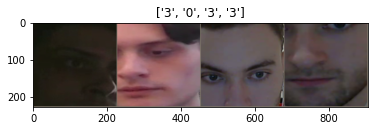

In [10]:
import torchvision


def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['Train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [11]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    CUDA_LAUNCH_BLOCKING = "1"
    since = time.time()

    # best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['Train', 'Validation']:
            if phase == 'Train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'Train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'Train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'Train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'Validation' and epoch_acc > best_acc:
                best_acc = epoch_acc
                # best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    # model.load_state_dict(best_model_wts)
    return model

In [13]:
#os.mkdir(dir_out + '/final_result/')
frames_dir = os.path.join(dir_out,os.listdir(dir_out)[0])
font = ImageFont.truetype(font_path, 90)


In [15]:
def visualize_model(model, num_images = len(frames_dir)):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['Test']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                img = Image.open(os.path.join(frames_dir,(os.listdir(frames_dir)[images_so_far - 1])))
                img_with_text = ImageDraw.Draw(img).text((0,0),class_names[preds[j]],fill = '#00ff2b', font = font)
                num = str(images_so_far - 1)
                num = "0" * (6 - len(num)) + num
                img.save(dir_out + '/final_result/'+ 'frame' + num + '.png')


                

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [16]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 4)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = torch.optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
import copy
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

In [ ]:
visualize_model(model_ft)

In [ ]:
os.chdir(dir_out + '/final_result')

In [ ]:
os.system('ffmpeg  -r 1 -i "frame%06d.png" final_video.avi')